# Part II - (Ford GoBike System Data)
## by (Richard Oloyede)


## Investigation Overview

In this investigation, I wanted to know what time of the day had the most ride, what day of the week had the most ride and also understand the charateristics features/variables that affect the Bike ride duration  



## Dataset Overview

The Ford GoBike System Data contains 20 features ('duration_sec','start_time','end_time','start_station_id','start_station_name','end_station_id','end_station_name','bike_id','user_type','member_birth_year', 'member_gender','bike_share_for_all_trip') and other with 183,412 datapoint for individauls in a bike-sharing system covering the greater San Francisco Bay area.for the month of Feburary 2019



In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [39]:
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))
# Change the current working directory
os.chdir('C:\\Users\\Richard\\Documents\\csv files')
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Richard\Documents\csv files
Current working directory: C:\Users\Richard\Documents\csv files


In [40]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

#creating a copy of the dataframe from wrangling
gobike_copy = gobike.copy()

#### Data wrangling

In [41]:
#change the datatype of start_time,end_time column to datatime
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'],errors='coerce')
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'],errors='coerce')

#checking the data type of the various columns
gobike_copy[['start_time','end_time']].dtypes


#change the datatype of start_station_id, end_station_id,bike_id to object using a for loop
for i in gobike_copy:
    for j in ['start_station_id','end_station_id','bike_id']:
        if i == j:
            gobike_copy[i] = gobike_copy[i].astype(str)
        
#checking the data type of the various columns                                                                           
gobike_copy[['start_station_id','end_station_id','bike_id']].dtypes   


#creating a new column for start and end time for day,month,year,hour
for i in gobike_copy:
    for j in ['start_time','end_time']:
        if i == j:
            gobike_copy[('day_')+i] = gobike_copy[i].dt.day
            gobike_copy[('month_')+i] = gobike_copy[i].dt.month
            gobike_copy[('year_')+i] = gobike_copy[i].dt.year
            gobike_copy[('hour_')+i] = gobike_copy[i].dt.hour

#creating a new column member age
current_year = 2019
member_age = []
for i in gobike_copy['member_birth_year']:
    member_age.append(2019-i)
gobike_copy['member_age'] = member_age


#changing the column data type
gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype(int,errors = 'ignore')
gobike_copy['member_age'] = gobike_copy['member_age'].astype(int,errors= 'ignore')



In [42]:
#converting the column into strings in other to perform from slicing operation
gobike_copy['start_time'] = gobike_copy['start_time'].astype(str)
gobike_copy['end_time'] = gobike_copy['end_time'].astype(str)

#slicing the columns to only display year,month and day
gobike_copy['start_week_day'] = gobike_copy['start_time'].str[:10]
gobike_copy['end_week_day'] = gobike_copy['end_time'].str[:10]

#converting the column back to datetime after slicing operation
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'],errors='coerce')
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'],errors='coerce')

gobike_copy['start_week_day'] = pd.to_datetime(gobike_copy['start_week_day'])
gobike_copy['end_week_day'] = pd.to_datetime(gobike_copy['end_week_day'])

#creating a new columns in the dataframe for the weekdays of the week
gobike_copy['start_week_day'] = gobike_copy['start_week_day'].dt.day_name()
gobike_copy['end_week_day'] = gobike_copy['end_week_day'].dt.day_name()

#creating a ctergorical class
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
days_classes = pd.api.types.CategoricalDtype(ordered=True,categories=days)

#changing the datatype of the variables
gobike_copy['start_week_day'] = gobike_copy['start_week_day'].astype(days_classes)
gobike_copy['end_week_day'] = gobike_copy['end_week_day'].astype(days_classes)

In [43]:
numeric_vars = ['duration_sec','hour_start_time','hour_end_time','day_start_time','day_end_time','member_age']
categoric_vars = ['user_type','member_gender','start_week_day','end_week_day','bike_share_for_all_trip']



## Distribution of Bike Ride Duration
The Bike ride duration has a long-tail distribution which is highly skewed to the right with most of individual bike ride durations at the low end of the duration and few at high end of the duration. When plotted on a log-scale we can see most to the duration bike rides are between 1000secs(16.33mins) and 500secs(8.33mins)

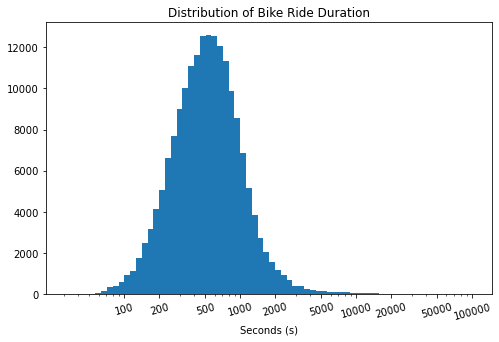

In [44]:
bins = 10**np.arange(1.5,5.0+0.05,0.05)

plt.figure(figsize=[8, 5])


plt.hist(data=gobike_copy,x='duration_sec',bins=bins);
plt.xscale('log');
xticks = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
labels = ['{:}'.format(v) for v in xticks]
plt.xticks(xticks,labels,rotation=15);
plt.xlabel('Seconds (s)');
plt.title('Distribution of Bike Ride Duration');

## Distribution of Bike Ride Start Time
The distribution of the hours individual started the bike ride looks bimodal with the hours 8:00 and 17:00 being the most time individual start their bike,which correspond to the time individual go to work and finish from work,while the hours between 0:00 and 5:00 getting the lowest frequency of time which expected. 
    The hours 10:00 to 16:00 getting an average frequency of time people borrow bikes which is also expected as its usually working hours 

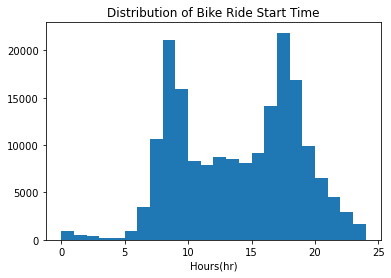

In [45]:
bins = np.arange(0,24+1,1)
plt.hist(data=gobike_copy,x='hour_start_time',bins=bins);
plt.xlabel('Hours(hr)');
plt.title('Distribution of Bike Ride Start Time');


## When is the most trips taken in terms of Days of the week?
The plot above reveals that the highest day an individual rider books a ride is <b>Thursday</b>

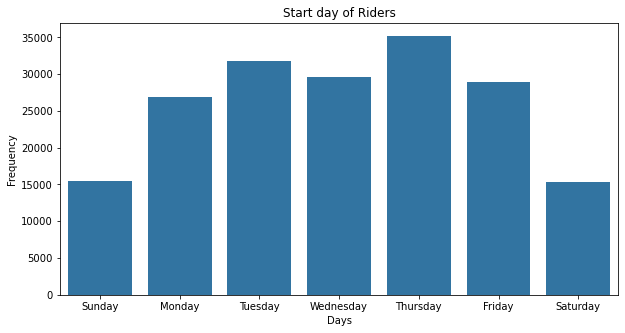

In [46]:
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=[10, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=gobike_copy,x='start_week_day',color=base_color,order=order);
plt.title('Start day of Riders');
plt.xlabel('Days');
plt.ylabel('Frequency');


## Bike Ride Duration by (User type, Gender ,Bike Share)
There appears the be a positive correlation between the duration time and the user type. while there is no relation between the duration time and the members gender or if the member shares a bike ride or not.

<Figure size 720x720 with 0 Axes>

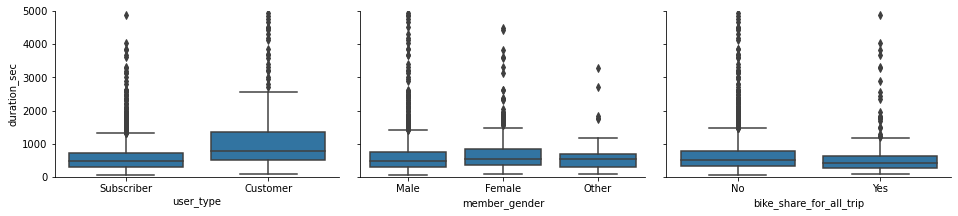

In [47]:
gobike_copy_samp = gobike_copy.sample(n=3000,replace=True)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.ylim([0,5000])

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = gobike_copy_samp, y_vars = ['duration_sec'], x_vars = ['user_type','member_gender','bike_share_for_all_trip'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

##  Bike Ride Duration by (Days of the week Ride started and ended)
The above plot shows longer bike duration ride as we go into the weekends the weekends such as high duration rides on <b>Friday,Saturday,Sunday</b>

<Figure size 720x720 with 0 Axes>

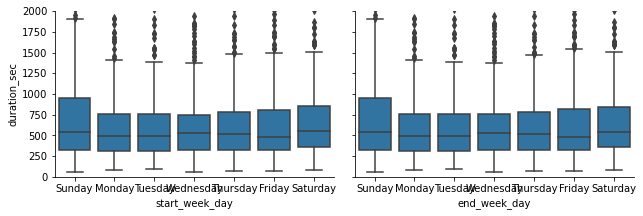

In [48]:
gobike_copy_samp = gobike_copy.sample(n=3000,replace=True)

order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

plt.figure(figsize = [10, 10]);
g = sns.PairGrid(data = gobike_copy_samp, y_vars = ['duration_sec'], x_vars = ['start_week_day','end_week_day'],
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.ylim([0,2000]);
plt.show();

## Bike Ride Duration by Age and User Type
The above plot depecits majority of lower ride duration in between customer and subscriber in the most in the 20's-60's age range.

The higher duration rides are mostly but the <b>customer</b>. This might futher support the bivariate boxplot between duration_sec and user_type being there is a correlation between high duration ride and user type customer, with the individuals in their 20's

Text(0.5, 1.0, 'Duration and Age By User Type')

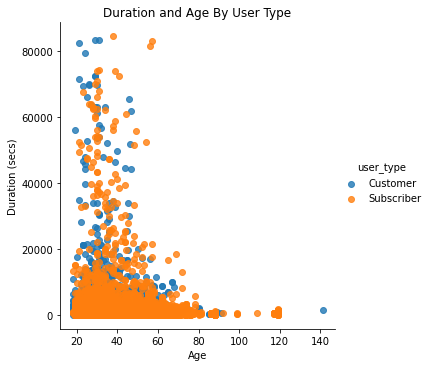

In [49]:
g = sns.FacetGrid(data=gobike_copy,hue='user_type',size=5)
g.map(sns.regplot,'member_age','duration_sec',fit_reg=False,x_jitter=0.04)
g.add_legend()
plt.xlabel('Age')
plt.ylabel('Duration (secs)')
plt.title('Duration and Age By User Type')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 